# Report from output data

In [13]:
results_file = "results/results_2024-04-28_18-34-25.csv"
times_file = "results/time_2024-04-28_18-34-25.csv"
original_results_file = "paper_results/results_original.csv"

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# set font size of labels on matplotlib plots
plt.rc('font', size=14)

# import seaborn as sns
import os
if "notebooks" in os.getcwd():
    os.chdir("..")

# Load the results
df_results = pd.read_csv(results_file, index_col=0)
df_times = pd.read_csv(times_file, index_col=0)

df_results = df_results.rename(index={"pen-based": "pendigits", "statlog": "satimage"})
df_times = df_times.rename(index={"pen-based": "pendigits", "statlog": "satimage"})


df_results_orig = pd.read_csv(original_results_file, index_col=0)
df_results_orig = df_results_orig.rename(index={"pen-based": "pendigits"})

In [14]:
df_results

,Uc,Uh,Ucos,ULp5,ULp8,NUc,NUh,NUcos,NULp5,NULp8
breast,0.833722,0.833722,0.833722,0.833722,0.833722,0.833722,0.833722,0.833722,0.833722,0.833722
ecoli,0.661301,0.285681,0.297321,0.509827,0.378794,0.400548,0.516547,0.344006,0.423186,0.294782
iris,0.730238,0.745504,0.745504,0.730238,0.651641,0.745504,0.601305,0.745504,0.730238,0.730238
pendigits,0.488184,0.534830,0.540418,0.509514,0.580265,0.399519,0.499143,0.483418,0.456929,0.441074
satimage,0.528169,0.175316,0.385652,0.387676,0.486725,0.418060,0.536073,0.530956,0.387334,0.418126
dermatology,0.041627,0.025377,0.020279,0.021791,0.019632,0.039899,0.026239,0.036062,0.019194,0.018266
wine,0.127817,0.053698,0.137907,0.127817,0.127817,0.071381,0.147492,0.134788,0.134788,0.134788


In [15]:
df_results_orig

,Uc,Uh,Ucos,ULp5,ULp8,NUc,NUh,NUcos,NULp5,NULp8
breast,0.0556,0.8673,0.1111,0.1212,0.1333,0.0380,0.8694,0.1173,0.1329,0.1126
ecoli,0.5065,0.4296,0.4359,0.4393,0.4284,0.5012,0.5470,0.4179,0.4174,0.4281
iris,0.7352,0.7338,0.7352,0.7352,0.7455,0.7325,0.7069,0.7455,0.7455,0.7352
pendigits,0.5347,0.5596,0.5814,0.5692,0.5527,0.5060,0.5652,0.5789,0.5684,0.5639
satimage,0.4501,0.4743,0.5322,0.4738,0.4834,0.3349,0.5323,0.5318,0.4691,0.4797
dermatology,0.0352,0.0661,0.0421,0.0274,0.0223,0.0386,0.0537,0.0490,0.0259,0.0309
wine,0.1448,0.1476,0.1448,0.1397,0.1379,0.1448,0.1336,0.1449,0.1447,0.1379


In [16]:
df_results.index

Index(['breast', 'ecoli', 'iris', 'pendigits', 'satimage', 'dermatology',
       'wine'],
      dtype='object')

## Metric by utility function

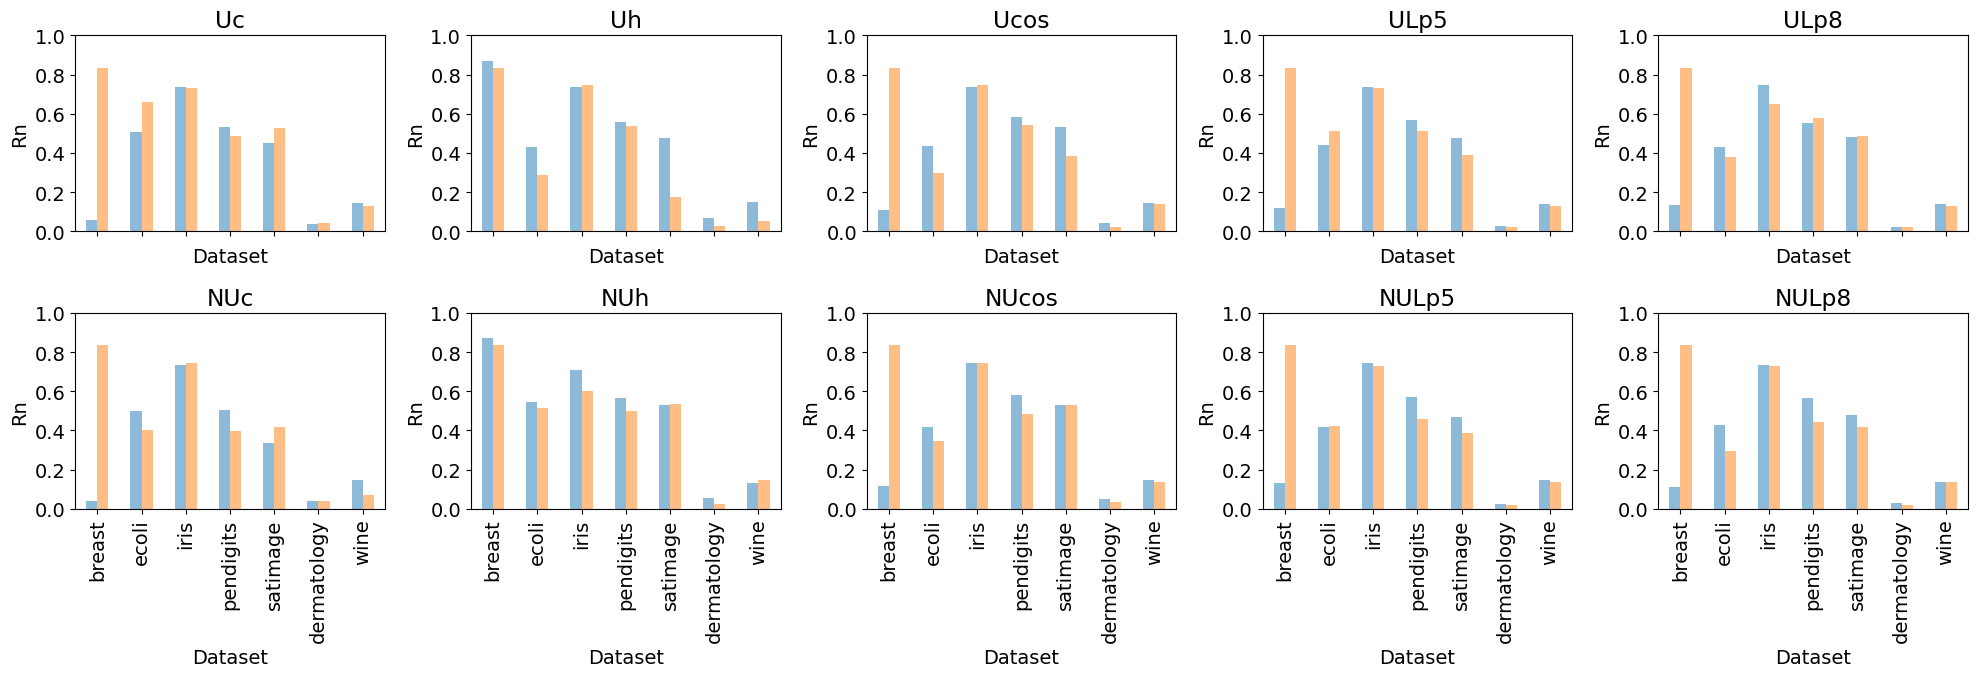

In [17]:
# plot the results comparison for Uc in each dataset between original and results

fig, ax = plt.subplots(2, 5, figsize=(20, 7))
ax = ax.ravel()
for i, metric in enumerate(df_results.columns):
    df_results_orig_uc = df_results_orig[metric].rename(metric +"_orig")
    df_results_uc = df_results[metric].rename(metric)
    df_uc = pd.concat([df_results_orig_uc, df_results_uc], axis=1)
    df_uc.plot(kind="bar", alpha=0.5, label="Original", ax=ax[i], legend=False)
    ax[i].set_title(metric)

for i in range(0, 5):
    ax[i].set_xticklabels([])

for i in range(10):
    ax[i].set_ylim(0, 1)
# plt.tight_layout()
    
for axx in ax:
    axx.set_ylabel("Rn")
    axx.set_xlabel("Dataset")

fig.tight_layout()

fig.savefig('img/results_comparison_metric.jpg', dpi=300, bbox_inches='tight')

## Metric by dataset

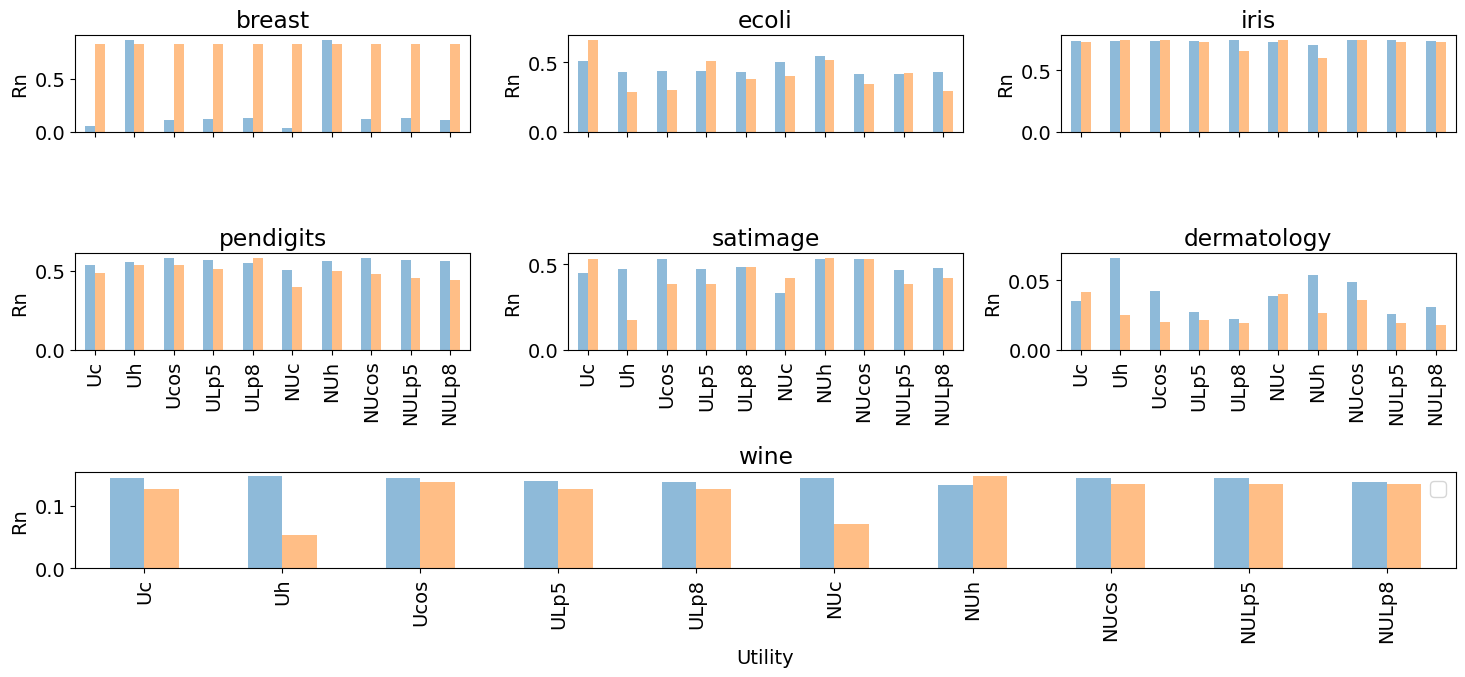

In [18]:
# plot the results comparison for Uc in each dataset between original and results

fig, ax = plt.subplots(3, 3, figsize=(15, 7))
ax = ax.ravel()

gs = ax[6].get_gridspec()
for a in ax[6:]:
    a.remove()
axbig = fig.add_subplot(gs[6:])

for i, dataset in enumerate(df_results.index):
    if i < 6:
        df_results_orig_uc = df_results_orig.loc[dataset, :].rename(metric +"_orig")
        df_results_uc = df_results.loc[dataset, :].rename(metric)
        df_uc = pd.concat([df_results_orig_uc, df_results_uc], axis=1)
        df_uc.plot(kind="bar", alpha=0.5, label="Original", ax=ax[i], legend=False)
        ax[i].set_title(dataset)
        plt.legend([])
    else:
        df_results_orig_uc = df_results_orig.loc[dataset, :].rename(metric +"_orig")
        df_results_uc = df_results.loc[dataset, :].rename(metric)
        df_uc = pd.concat([df_results_orig_uc, df_results_uc], axis=1)
        df_uc.plot(kind="bar", alpha=0.5, label="Original", ax=axbig)
        axbig.set_title("wine")
        plt.legend([])

for axx in ax:
    axx.set_ylabel("Rn")

for i in range(3):
    ax[i].set_xticklabels([])



axbig.set_ylabel("Rn")
axbig.set_xlabel("Utility")

# plt.suptitle("Results comparison between original and results (original in blue)")
plt.tight_layout()

fig.savefig('img/results_comparison_dataset.jpg', dpi=300, bbox_inches='tight')


## Average performance of each metric

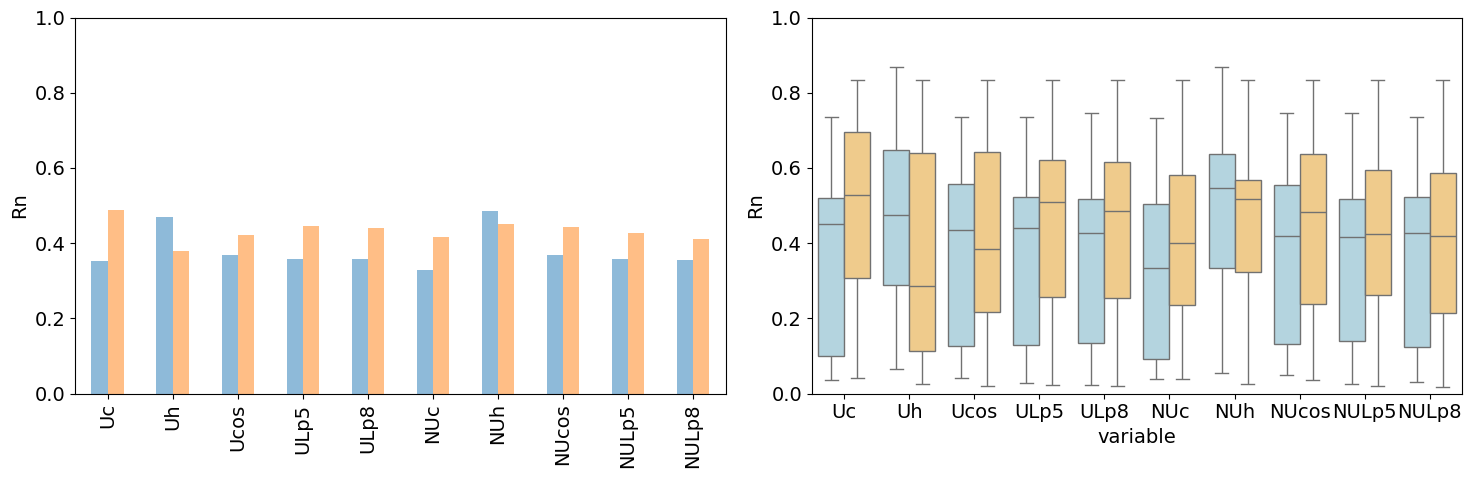

<Figure size 1000x500 with 0 Axes>

In [22]:
df_out = pd.DataFrame(index=df_results.columns, columns=["Original", "New"])
df_out["Original"] = df_results_orig.mean()
df_out["New"] = df_results.mean()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# df_results_orig.mean().plot(kind="bar", alpha=0.5, label="Original", figsize=(10, 5))
df_out.plot(kind="bar", alpha=0.5, ax = ax[0], legend=False)

df_out_total = df_results.copy()
df_out_total["source"] = "Results"
df_results_orig_aux = df_results_orig.copy()
df_results_orig_aux["source"] = "Original"
df_out_total = pd.concat([df_results_orig_aux, df_out_total], ignore_index=True)

# import seaborn as sns
df_plot = df_out_total.melt(id_vars="source")

plt.figure(figsize=(10, 5))
import seaborn as sns

# use matplotlib style for seaborn
# plt.style.use('classic')

sns.boxplot(x="variable", y="value", hue="source", data=df_plot, palette=["lightblue", "#FFCF7B"], ax=ax[1],
            legend=False)

for axx in ax:
    axx.set_ylim(0, 1)

    axx.set_ylabel("Rn")

fig.tight_layout()

fig.savefig('img/compare_metrics_distribution.jpg', dpi=300, bbox_inches='tight')
plt.show()


<Axes: xlabel='variable', ylabel='value'>

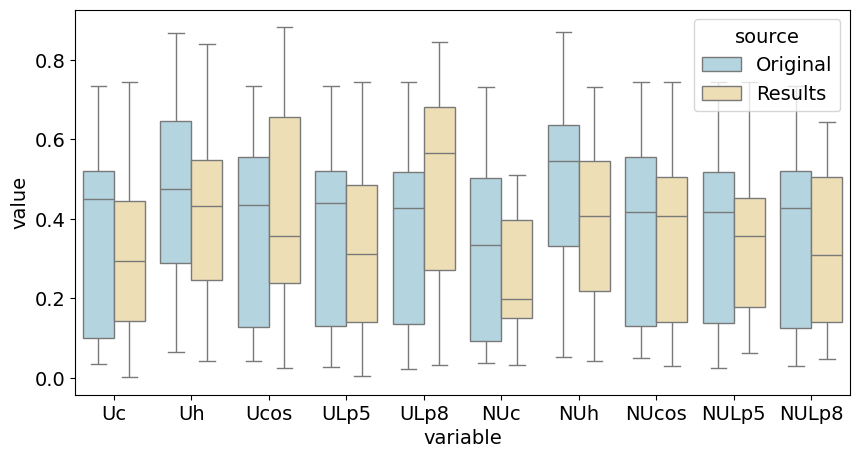

In [ ]:
df_out_total.melt(id_vars="source")

,source,variable,value
0,Original,Uc,0.05560
1,Original,Uc,0.50650
2,Original,Uc,0.73520
3,Original,Uc,0.53470
4,Original,Uc,0.45010
...,...,...,...
135,Results,NULp8,0.64445
136,Results,NULp8,0.62502
137,Results,NULp8,0.38825
138,Results,NULp8,0.04812


## Times Analysis

In [19]:
df_times = df_times.drop(columns="KMeans_100times")
df_times.plot

<Axes: >

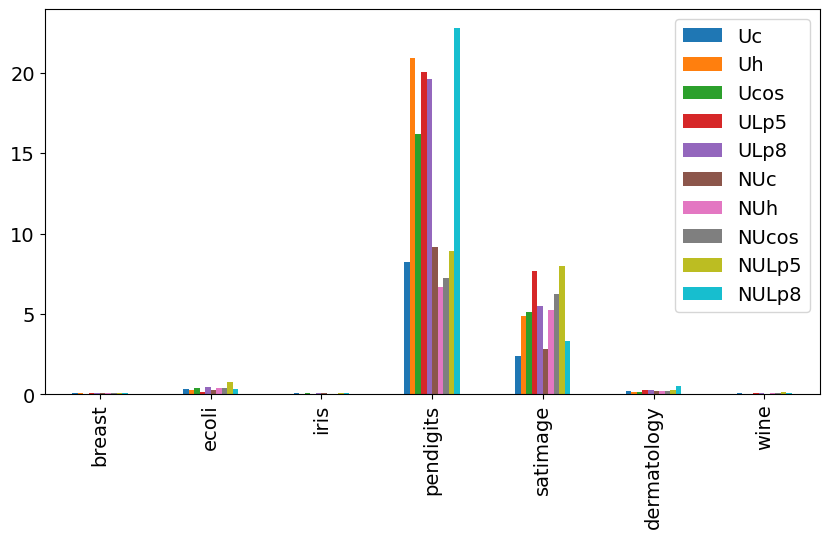

In [20]:
df_times.plot(kind="bar", figsize=(10, 5))

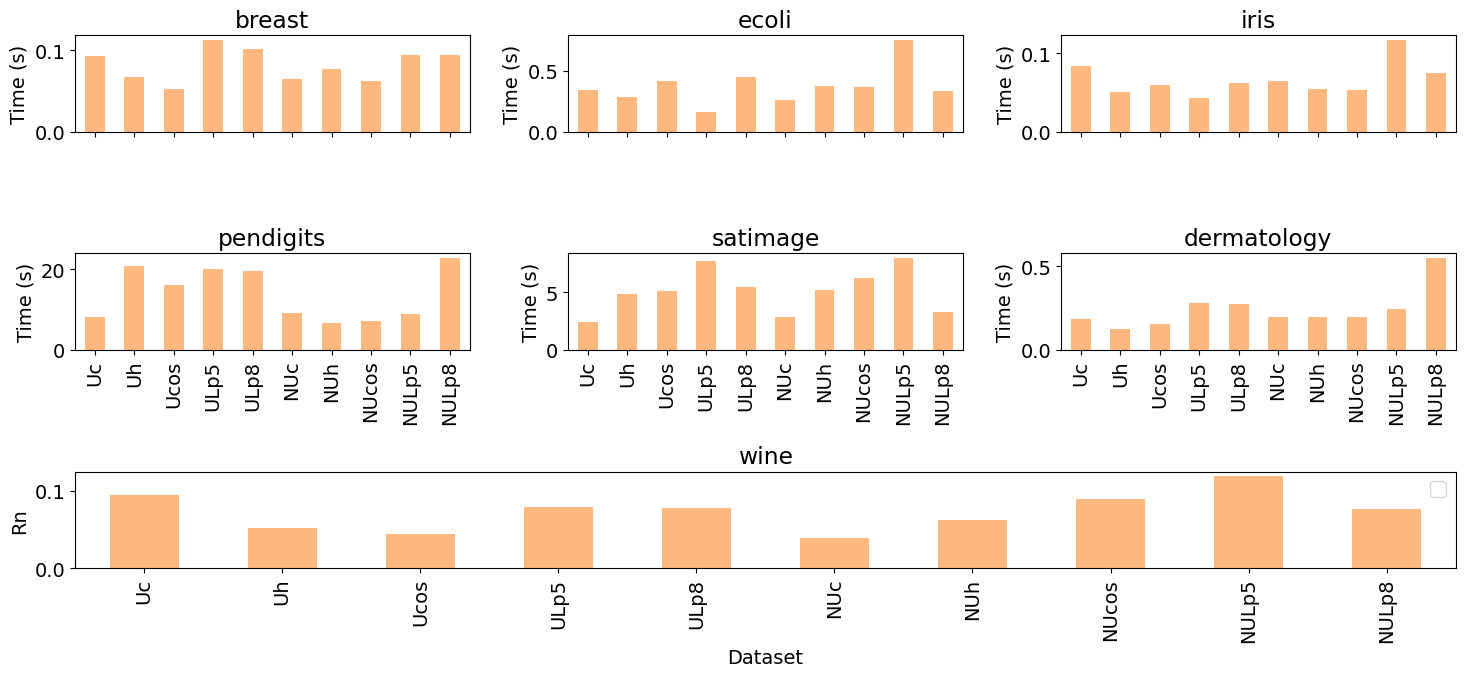

In [21]:
# plot the results comparison for Uc in each dataset between original and results

fig, ax = plt.subplots(3, 3, figsize=(15, 7))
ax = ax.ravel()

gs = ax[6].get_gridspec()
for a in ax[6:]:
    a.remove()
axbig = fig.add_subplot(gs[6:])

for i, dataset in enumerate(df_results.index):
    if i < 6:
        df_times_uc = df_times.loc[dataset, :]
        df_times_uc.plot(kind="bar", alpha=0.5, label="Results", ax=ax[i], legend=False, color="#FF7400")
        ax[i].set_title(dataset)
        plt.legend([])
    else:
        df_times_uc = df_times.loc[dataset, :]
        df_times_uc.plot(kind="bar", alpha=0.5, label="Results", ax=axbig, legend=False, color="#FF7400")
        axbig.set_title("wine")
        plt.legend([])

for axx in ax:
    axx.set_ylabel("Time (s)")

for i in range(3):
    ax[i].set_xticklabels([])



axbig.set_ylabel("Rn")
axbig.set_xlabel("Dataset")

# plt.suptitle("Results comparison between original and results (original in blue)")
plt.tight_layout()

fig.savefig('img/time_comparison_dataset.jpg', dpi=300, bbox_inches='tight')


In [ ]:
df_times

,Uc,Uh,Ucos,ULp5,ULp8,NUc,NUh,NUcos,NULp5,NULp8
breast,1.7220,2.4250,1.1930,2.0590,2.2790,1.2980,1.3140,1.653,2.0950,2.7190
ecoli,2.7000,4.3290,3.0550,4.9990,4.9250,3.0460,4.2580,2.961,5.4780,5.1720
iris,0.4850,0.6040,0.4970,0.7080,0.6990,0.6380,0.7820,0.594,0.8770,0.8620
pen-based,111.1720,954.1110,145.5220,760.9350,677.2280,168.8660,1279.6050,177.599,672.5750,751.5600
satimage,33.7850,396.5910,71.4280,194.7940,159.1240,84.1480,379.5730,77.627,220.0020,200.9190
dermatology,11.8188,12.9196,8.1311,23.7464,20.3015,7.8147,10.5146,7.111,5.5831,16.3076
wine,2.7515,2.2397,2.9739,3.8482,4.6733,2.5529,3.0766,2.843,4.5867,4.5433
